<a href="https://colab.research.google.com/github/mbahlin/MAT421/blob/main/MAT421HWH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 22.1 ODE Initial Value Problem Statement 

Differential Equation - Relationship between a function f(x), its independent variable , x, and any number of its derivatives

Ordinary Differential Equation (ODE) - Differential equation where the independent variable and therefore its derivatives are in one-dimension

F(x, f(x), df(x)/dx, ..., d^n-1 f(x)/dx^n-1) = d^n f(x)/dx^n

 - F = Arbitrary Function that incorporates one or all of the input arguments 
 - n = order of the differential equations
 - n^th order ODE

Partial Differential Equation (PDE) - A general form differential equation where x is a vector containing the independent variables, x1, x2, x3, ..., xm, and the partial derivatives can be of any order and with respect to any combination of variables.

General Solution - g(x) that satisfies the differential equation. 

Particular Solution - p(x) that satisfies the ODE of order n, and n explicitly known values of the solution, its derivatives, or certain points - referred to as solution.

Initial Value - A common set of known values for an ODE solution.

Initial Value Problem - Finding an ODE solution given an initial value.

# 22.2 Reduction of Order

Reduce the Order - Go from higher order ODEs to a first order ODE.

State of the System - S(t) - Collection of all the dependent variables that are relevant to the behavior of the system.

Turn an nth order ODE into n 1st order ODEs that are coupled together, meaning they share the same terms.

Linear ODE's can be written in the matrix form: dS(t)/dt = [ 0, 1; -g/l, 0]S(t)

The State can hold multiple dependent variables and their derivatives as long as the derivatives are with respect to the same independent variable.

# 22.3 The Euler Method

Explicit Euler Formula - Used to compute an approximation for the state at S(t_jplus1) given the state at S(t_j). Is the simplest and most intuitive method for solving IVPs. At any state (t_j, S(t_j)) it uses F at that state to point toward the next state and then mobes in that direction a distance of h.

S(t_jplus1) = S(t_j) + h*F(t_j , S(t_j))

We can compute S(t_j) for every t_j in t using the steps:

1. Store S0 = S(t0) in an array, S.
2. Compute S(t1) = S0 + hF(t0, S0).
3. Store S1 = S(t1) in S.
4. Compute S(t2) = S1 + hF(t1, S1).
5. Store S2 = S(t2) in S.
6. ...
7. Compute S(t_f) = S_fminus1 + hF(t_fminus1, S_fminus1).
8. Store S_f = S(t_f) in S.
9. S in an approximation of the solution to the initial value problem.


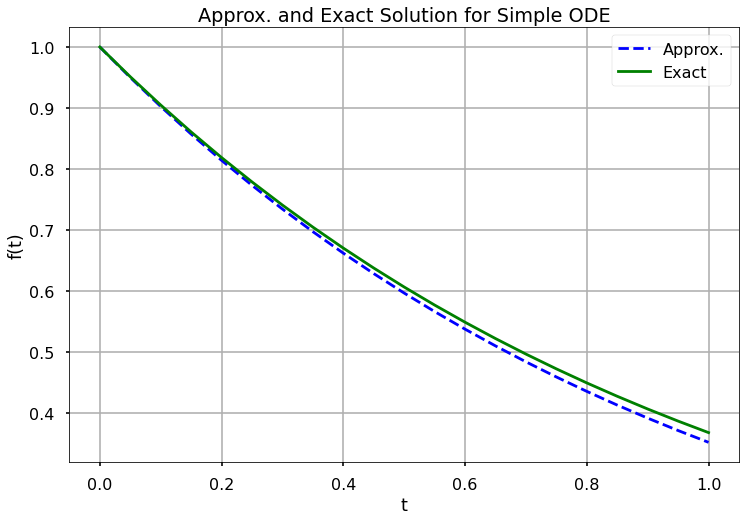

In [9]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
%matplotlib inline

# Define parameters
f = lambda t, s: -np.exp(-t)
h = 0.05 
t = np.arange(0, 1 + h, h)
s0 = 1

s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
      s[i + 1] = s[i] + h*f(t[i], s[i])

plt.figure(figsize = (12, 8))
plt.plot(t, s, 'b--', label='Approx.')
plt.plot(t, np.exp(-t), 'g', label='Exact')
plt.title('Approx. and Exact Solution for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='upper right')
plt.show()

Implicit Euler Formula - S(t_jplus1) = S(t_j) + hF(t_jplus1, S_jplus1)

Trapzoidal Formula - S(t_jplus1) = S(t_j) + (h/2)(F(t_j, S_j) + F(t_jplus1, S_jplus1))

# 22.4 Numerical Error and Instability



Accuracy - A scheme's ability  to get close to the exact solution, which is usually unknown as a function of the step-size h. O(h^p)

Stability - A scheme's ability to keep the error from growing as it integrates forward in time. If the error doesn't grow, then the scheme is stable, otherwise it is unstable

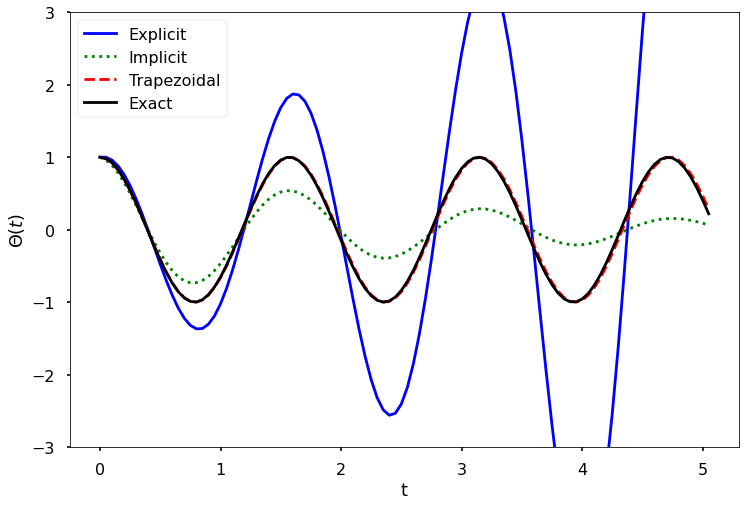

In [14]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline 

# define step size
h = 0.05
# define numerical grid
t = np.arange(0, 5.1, h)
# oscillation freq. of pendulum
w = 4
s0 = np.array([[1], [0]])

m_e = np.array([[1, h], [-w**2*h, 1]])
m_i = inv(np.array([[1, -h], [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2], [w**2*h/2,1]])), np.array([[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# do integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])
    
plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

# 22.5 Predictor-Corrector and Runge Kutta Methods

Predictor-Corrector Methods - (Solving IVPs) - Improve the approximation accuracy of non-predictor-corrector methods by querying the F function several times at different locations(predictions), and then using a weighted average of the results(corrections) to update the state. 

 - Predictor - An explicit formula and 1st estimates the solution at t_jplus1. Eulers or another method can be used to finish this step. 

 - Corrector - Can be applied to improve accuracy after obtaining the solution S(t_jplus1)

Midpoint Method - Has a predictor step which is the prediction of the solution value halfway between t_j and t_jplus1. It then computes the corrector step using the derivative from S(t_j + h/2).

S(t_j + h/2) = S(t_j) + (h/2)F(t_j , S(t_j))


Runge Kutta Methods (RK) - Based on truncated Taylor series

Fourth Order Runge Kutta (RK4) - Obtained from the Taylor series using four points k1, k2, k3, and k4. A weighted average is used to find the approximation of the solution, which is O(h^4) (4th order accurate)

  - k1 = F(t_j , S(t_j))
  - k2 = F(t_j + h/2 , S(t_j) + (1/2)k1*h)
  - k3 = F(t_j + h/2 , S(t_j) + (1/2)k2*h)
  - k4 = F(t_j + h , S(t_j) + k3*h)

S(t_jplus1) = S(t_j) + (h/6)(k1 + 2*k2 + 2*k3 + k4)  




# 22.6 Python ODE Solvers

solve_ivp(fun, t_span, s0, method='RK45', t_eval=None)

- fun = Takes in function in the right-hand side of the system.
- t_span = Interval of integration (t0, tf). t0 is the start, and tf is the end of the interval.
- s0 = Initial state.
- 'RK45' = default Runge Kutta method - explicit Runge Kutta method of order 5(4)
- t_eval = takes in times a which to store the computed solution, must be sorted and lie within t_span.

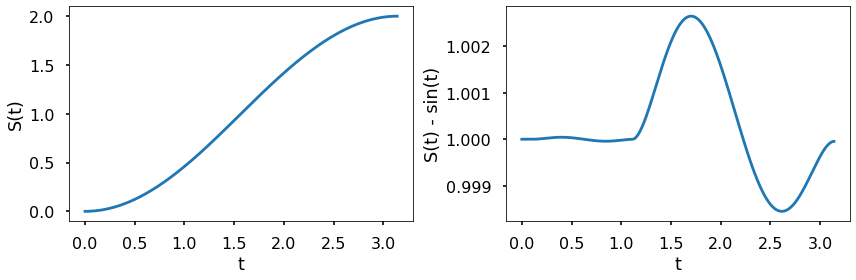

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

plt.style.use('seaborn-poster')

%matplotlib inline

F = lambda t, s: np.sin(t)

t_eval = np.arange(0, np.pi, 0.01)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] + np.cos(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

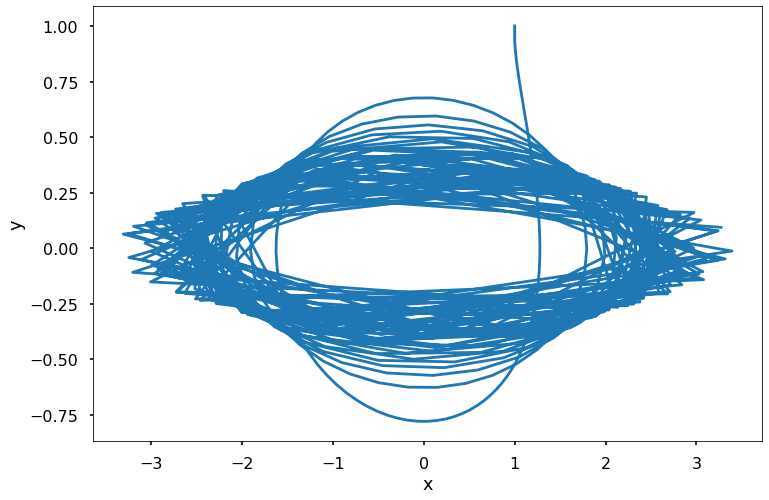

In [22]:
F = lambda t, s: np.dot(np.array([[0, t**3], [-t, 0]]), s)

t_eval = np.arange(0, 10.02, 0.02)
sol = solve_ivp(F, [0, 10], [1, 1], t_eval=t_eval)

plt.figure(figsize = (12, 8))
plt.plot(sol.y.T[:, 0], sol.y.T[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()